In [63]:
%pip install numpy
%pip install matplotlib
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
def f(x):
    return 3*x**2 - 4*x + 5

In [66]:
print(f(3.0))

20.0


array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

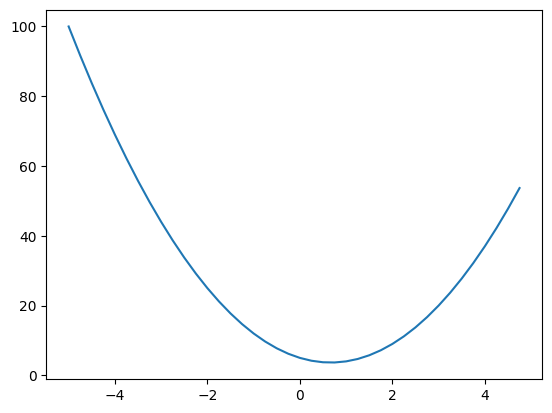

In [67]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs,ys)
ys

In [68]:
#single variable derivative

h = 0.00000001
def derivative(x):
    return (f(x + h) - f(x))/h
derivative(2/3)


0.0

[25.   24.25 23.5  22.75 22.   21.25 20.5  19.75 19.   18.25 17.5  16.75
 16.   15.25 14.5  13.75 13.   12.25 11.5  10.75 10.    9.25  8.5   7.75
  7.    6.25  5.5   4.75  4.    3.25  2.5   1.75  1.    0.25 -0.5  -1.25
 -2.   -2.75 -3.5  -4.25]


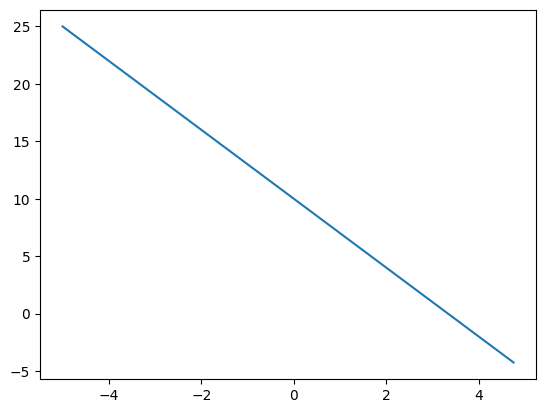

In [69]:
# multi-variable / multiple inputs

a = xs
b = -3.0
c = 10

d = a*b + c
print(d)

plt.plot(xs, d)



In [70]:
#inputs
a = 2.0
b = -3.0
c = 10.0
#small change
h = 0.00000001

#function
d1 = a*b + c
print(d1)

#increment inputs by h
b += h
d2 = a*b + c
print(d2)

#slope/derivative
print('slope', (d2-d1)/h)

4.0
4.00000002
slope 1.999999987845058


### below is the main value object which stored data and its children and the operation used and does all the operations this class in the key to everything

In [ ]:
class value:
    def __init__ (self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"value(data = {self.data})"
    
    def __add__(self, other):
       out = value(self.data + other.data, (self,other), '+')
       return out
    
    def __mul__(self, other):
        out = value(self.data * other.data, (self,other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = value(t, (self,), 'tanh')
        return out
    
    

In [72]:
a = value(2.0, label = 'a')
b = value(-3.0, label = 'b')
c = value(10.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label= 'd'
f = value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L #assume this as ur loss function


value(data = -8.0)

In [73]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

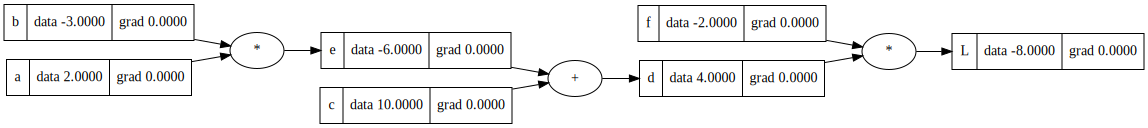

In [74]:
draw_dot(L)

# manual backprop

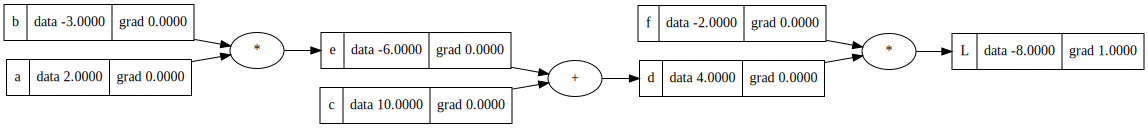

In [75]:
L.grad = 1.0

'''
dl/dl = 1

l+h - l/h gives 1
'''
draw_dot(L)

l = d * f
lets try calculating dl/dd

>   
    {f(x+h) -f(x)} / h

    [{(d+h) * f} - d *f ] / h
    df + hf -df /h
    hf/h
    ==f

so 
dl/dd is f accoding to ..rule


implies d.grad is f and f.grad is d by symmetry

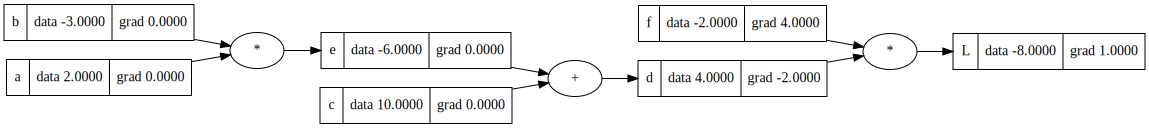

In [76]:
d.grad = f.data
f.grad = d.data
draw_dot(L)

## now this is the whole game

calculating dl/dc

need dl/dc right for getting gradient or how much change in c is affecting the final loss function

we know dl/dd which was f
we can get dd/dc


d = c + e
dd /dc is 
take other variables constant and derivate wrt to c
so dd/dc comes out 
dd/dc = 1.0
same for dd/de = 1.0 same logic

or

>   
    {f(x+h) -f(x)} / h
    here f(x) is d

    [{(c + h) + e} - {c + e} ] / h
    h/h= 1.0

and if we see the xpression d = c + e
by symmetry dd / de = 1.0



here comes chain ruleeee

 If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as d z d x = d z d y ⋅ d y d x , {\displaystyle {\frac {dz}{dx}}={\frac {dz}{dy}}\cdot {\frac {dy}{dx}},}

 in this case

 l is dependent on e which inturn is dependent on c

 so dl/dc = dl/de. de/dc
 have both dl/de was f = -2.0 and de/dc = 1.0 just calculated it
 so dl/dc is -2.0

 can be verified via lol function below by adding h to c and checking the output

 As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."
 refered wikipedia for explanation of derivative and chain rule 

 summary

 derivative = rate of change of x wrt to y
 chain rule if there one more intermeditory step then multiply both rates and u get direct rate of change of both on the ends

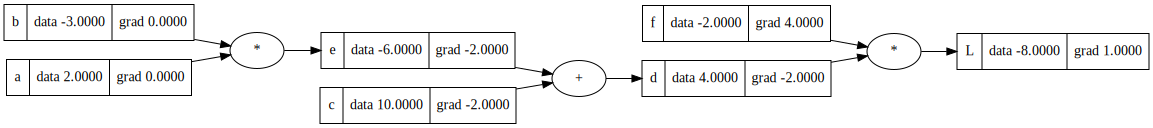

In [77]:
#so
c.grad = d.grad * 1.0
e.grad = d.grad * 1.0
#going good
draw_dot(L)

now for 
dl/da and dl/db

we know

e = a + b
de/da = b
de/db = a

and dl/dd is -2.0

so by chain rule

dl/da = dl/de.de/da = -2.0 * - 3.0 = 6.0
dl/db = dl/de.de/db = -2.0 * 2.0 = 4.0

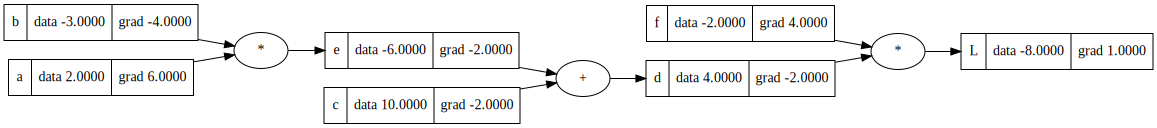

In [78]:
#update with manual grad values

a.grad = e.grad * b.data #b.data is de/da
b.grad = e.grad * a.data #a.data is de/db
draw_dot(L)

done with manual backprop for whole graph now

## derivative here is taken in the following manner(automated rate of change calculator)

add h to whichever node whose rate of change we need to see
how much affect does output or L in this case has if there is a small change in any parameter/ leaf node 

> derivative of f(x) = [f(x+h) - f(x)] / h

implying slight change in any parameter as n the below example where a was incremented with h and then calculation was incremented - initial / h

In [79]:
#manual backpropagation
def lol():
    a = value(2.0, label = 'a')
    b = value(-3.0, label = 'b')
    c = value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = value(-2.0, label = 'f')
    L = d * f; L.label = 'L' #assume this as ur loss function
    L1 = L.data #initial
    h = 0.001
    
    
    a = value(2.0, label = 'a')
    b = value(-3.0, label = 'b')
    c = value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = value(-2.0, label = 'f')
    L = d * f; L.label = 'L' #assume this as ur loss function
    L2 = L.data + h #after nudging some param by h

    print((L2 - L1) / h)


lol()
    

1.000000000000334


Backprop over neuron


0.7071067811865476


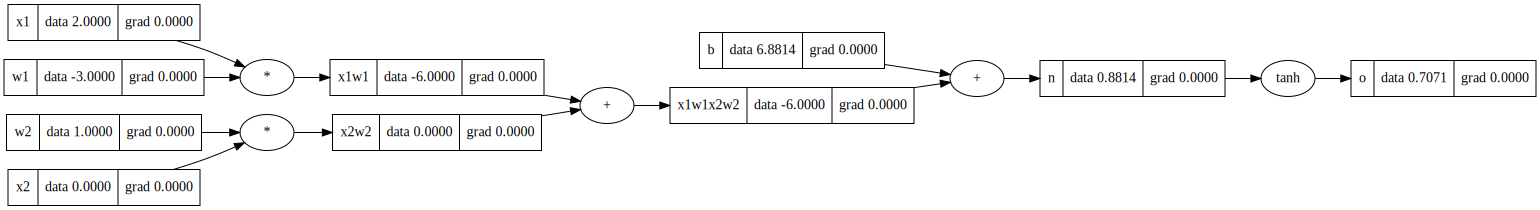

In [80]:
#inputs x1 x2
x1 = value(2.0, label='x1')
x2 = value(0.0, label='x2')
#weights w1 w2
w1 = value(-3.0, label='w1')
w2 = value(1.0, label='w2')
#bias b
b = value(6.8813735870195432, label='b')
#x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
#raw output
n = x1w1x2w2 + b; n.label = 'n'
#final output
o = n.tanh(); o.label = 'o'
print(o.data)

draw_dot(o)

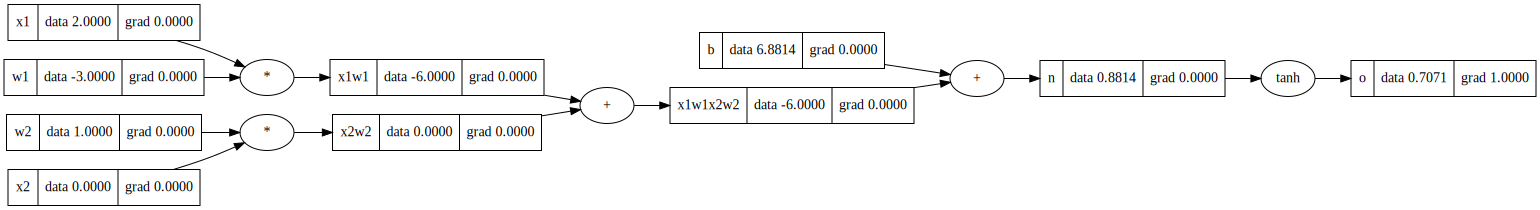

In [81]:
o.grad = 1.0
draw_dot(o)

o = tanh(n)
we need do/dn
d tanh(x)/ dx = 1 - tanh^2(x)
do/dn = 1 - o^2
so by calculating its 0.5


0.7071067811865476
0.7076064277165492
0.0004996465300016739


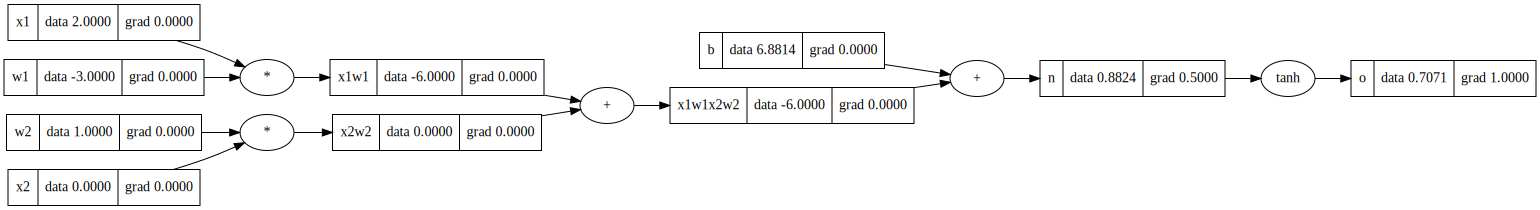

In [82]:
n.grad = round(1 - o.data**2, 5)
draw_dot(o)
#verify by adding 0.00001 to n and seeing change in o to check if it comes equal to 0.5
o1 = o.data
print(o1)
n.data += 0.001
o2 = n.tanh()
print(o2.data)
print(o2.data - o1)
draw_dot(o)


as n = addition of weighted inputs + bias the gradient of n will to both of them as local derivative of addition is 1.0

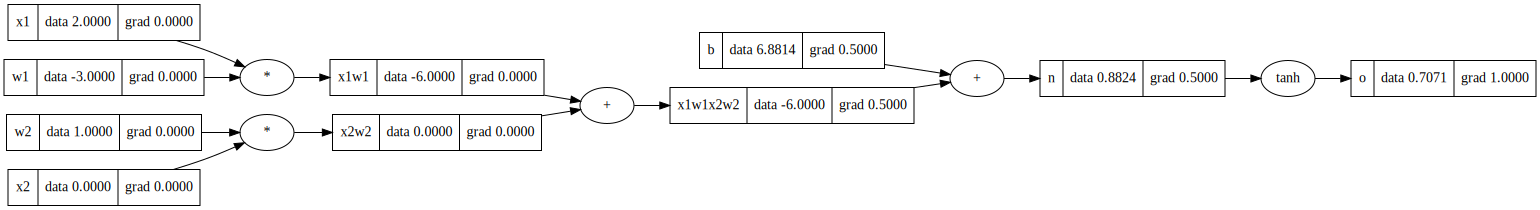

In [83]:
x1w1x2w2.grad = n.grad * 1.0
b.grad = n.grad * 1.0
draw_dot(o)

x1w1x2w2 = x1 * w1 + x2 * w2 an addition so gradient will be passed as it is to both the children same as above

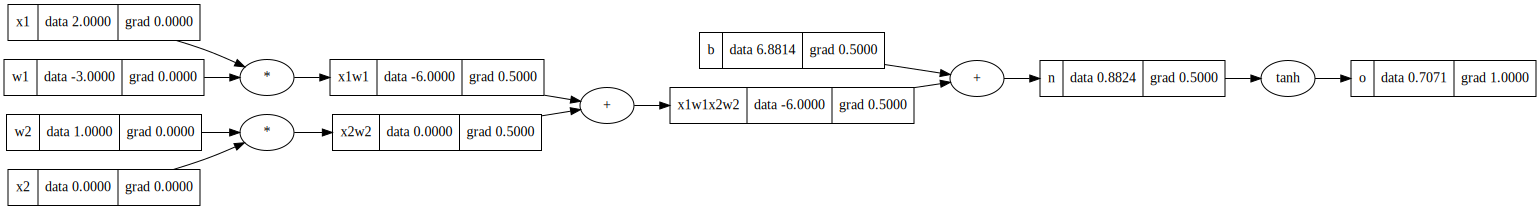

In [84]:
x2w2.grad = x1w1x2w2.grad * 1.0
x1w1.grad = x1w1x2w2.grad * 1.0
draw_dot(o)

x2w2 = x2 * w2 so here local derivative wrt to x2 is w2 and wrt to w2 is x2 so we multiply the gradient passed from above with local derivative to get final gradient for both the children nodes
same for x1w1

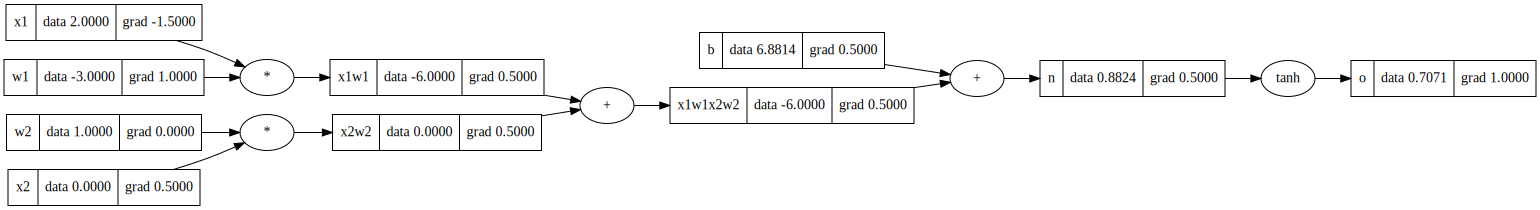

In [85]:
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
draw_dot(o)

woah manual backprop done!